<a href="https://colab.research.google.com/github/Siddhant254/CNN/blob/main/dogsVScats_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Connecting colab with kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
# Importing dataset
!kaggle datasets download -d salader/dogsvscats

100% 1.06G/1.06G [00:57<00:00, 20.7MB/s]
100% 1.06G/1.06G [00:57<00:00, 19.7MB/s]


In [7]:
# Extracting contents from zipfile
import zipfile
zip_file = zipfile.ZipFile('/content/dogsvscats.zip')
zip_file.extractall('/content')
zip_file.close()

# VGG-16 Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [9]:
# Creating image dataset from directory of image files
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', labels='inferred',
    label_mode = 'int' , batch_size=32 , image_size=(224,224))

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', labels='inferred',
    label_mode = 'int' , batch_size=32 , image_size=(224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalization
def process(image,label):
  image = tf.cast(image/255.0 , tf.float32)
  return image,label

In [11]:
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

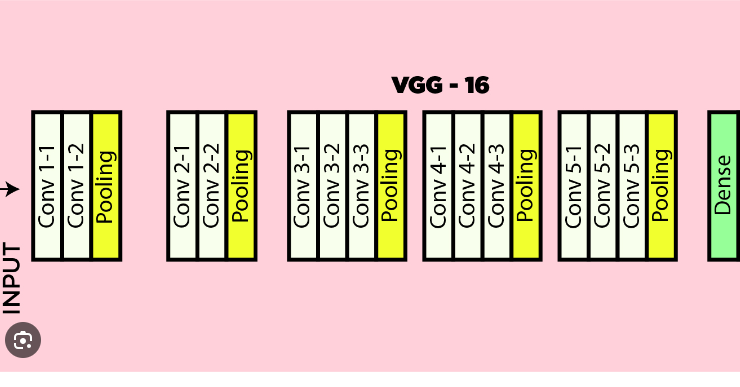

In [ ]:
# VGG 16
model = Sequential()

# Block 1
model.add(Conv2D(64 ,kernel_size=(3,3) ,activation='relu' ,input_shape=(224,224,3)))
model.add(Conv2D(64 ,kernel_size=(3,3) ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2))

# Block 2
model.add(Conv2D(128 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(128 ,kernel_size=(3,3) ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2))

# Block 3
model.add(Conv2D(256 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(256 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(256 ,kernel_size=(3,3) ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2))

# Block 4
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2))

# Block 5
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(512 ,kernel_size=(3,3) ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2))

# Flatten
model.add(Flatten())

# FC1
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.3))

# FC2
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.3))

# Output
model.add(Dense(1,activation='sigmoid'))

# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 220, 220, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 128)    

In [ ]:
# Preparing model for training
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

In [ ]:
# Fitting model on our data
history = model.fit(train_ds ,epochs=5 ,validation_data=val_ds)

Epoch 1/5
625/625 [==============================] - 285s 409ms/step - loss: 0.7384 - accuracy: 0.5457 - val_loss: 0.8823 - val_accuracy: 0.5166
Epoch 2/5
625/625 [==============================] - 256s 409ms/step - loss: 0.6938 - accuracy: 0.5423 - val_loss: 0.6765 - val_accuracy: 0.5622
Epoch 3/5
625/625 [==============================] - 256s 409ms/step - loss: 0.6930 - accuracy: 0.5386 - val_loss: 0.6775 - val_accuracy: 0.5708
Epoch 4/5
625/625 [==============================] - 259s 414ms/step - loss: 0.6752 - accuracy: 0.5745 - val_loss: 0.6728 - val_accuracy: 0.5974
Epoch 5/5
625/625 [==============================] - 254s 405ms/step - loss: 0.6426 - accuracy: 0.6356 - val_loss: 0.6437 - val_accuracy: 0.6246


# Transfer Learning - VGG 16

In [12]:
from keras.applications.vgg16 import VGG16

In [13]:
# Initializing a VGG16 Convolution base
conv_base = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation='sigmoid'))
model.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])
history = model.fit(train_ds , epochs=5 , validation_data=val_ds)

Epoch 1/5
625/625 [==============================] - 287s 414ms/step - loss: 0.8493 - accuracy: 0.5211 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 254s 406ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 256s 408ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 254s 406ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 255s 408ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5000
